<a href="https://colab.research.google.com/github/joaochenriques/IST_MCTE/blob/main/Tides/aAxial_aTide_aTang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pathlib
if not pathlib.Path("mpl_utils.py").exists():
  !curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py

In [46]:
import matplotlib.pyplot as mpl
import numpy as np
import mpl_utils as mut
mut.config_plots()

mpl.rcParams["figure.figsize"] = (6,4.5)
%config InlineBackend.figure_formats = ['svg']

In [47]:
def f_R( φ ):
    fr =  np.cos(φ)
    fφ = -np.sin(φ)

    fx = fr*np.cos(φ) - fφ*np.sin(φ)
    fy = fr*np.sin(φ) + fφ*np.cos(φ)
    
    return ( fx, fy ) 

def f_tide( φ ):
    fr = (+3.0*np.cos(φ)**2 - 1.0)
    fφ = (-3.0*np.sin(2.0*φ) / 2.0)

    fx = fr*np.cos(φ) - fφ*np.sin(φ)
    fy = fr*np.sin(φ) + fφ*np.cos(φ)
    
    return ( fx, fy ) 


def f_tide_tangential( φ ):
    fφ = (-3.0*np.sin(2.0*φ) / 2.0)

    fx = - fφ*np.sin(φ)
    fy = + fφ*np.cos(φ)
    
    return ( fx, fy ) 

In [48]:
cphi = 2.0*np.pi*np.linspace( 0.0, 1.0, 210 )
circ = np.column_stack( ( np.cos(cphi), np.sin(cphi) ) )

In [49]:
φ = 2.0*np.pi*np.linspace( 0.0, 1.0, 21 )

tail = np.column_stack( ( np.cos(φ), np.sin(φ) ) )
head_fR = np.column_stack( f_R( φ ) )
head_ft = np.column_stack( f_tide( φ ) )
head_ftan = np.column_stack( f_tide_tangential( φ ) )

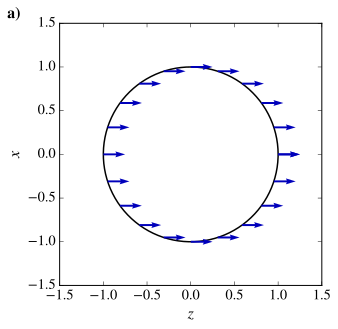

In [50]:
mpl.plot( circ[:,0], circ[:,1], 'k-' )
mpl.quiver( tail[:,0], tail[:,1], head_fR[:,0], head_fR[:,1], color='#0000BB', scale=12, zorder=4)
mpl.xlim(-1.5,1.5)
mpl.ylim(-1.5,1.5)
mpl.xlabel("$z$")
mpl.ylabel("$x$")
mpl.gca().set_aspect('equal', 'box')
ax1 = mpl.gca()
ax1.text(-0.2, 1.02, 'a)', transform=ax1.transAxes, size=16, weight='semibold')
mpl.savefig( 'a_axial.pdf', bbox_inches='tight', pad_inches=0 )

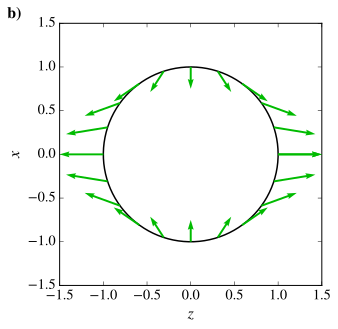

In [51]:
mpl.plot( circ[:,0], circ[:,1], 'k-' )
mpl.quiver( tail[:,0], tail[:,1], head_ft[:,0], head_ft[:,1], color='#00BB00', scale=12, zorder=4)
mpl.xlim(-1.5,1.5)
mpl.ylim(-1.5,1.5)
mpl.xlabel("$z$")
mpl.ylabel("$x$")
mpl.gca().set_aspect('equal', 'box')
ax2 = mpl.gca()
ax2.text(-0.2, 1.02, 'b)', transform=ax2.transAxes, size=16, weight='semibold')
mpl.savefig( 'a_tide.pdf', bbox_inches='tight', pad_inches=0 )

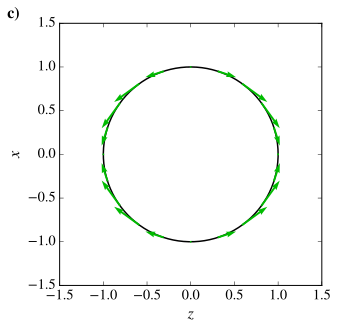

In [52]:
mpl.plot( circ[:,0], circ[:,1], 'k-' )
mpl.quiver( tail[:,0], tail[:,1], head_ftan[:,0], head_ftan[:,1], color='#00BB00', scale=12, zorder=4)
mpl.xlim(-1.5,1.5)
mpl.ylim(-1.5,1.5)
mpl.xlabel("$z$")
mpl.ylabel("$x$")
mpl.gca().set_aspect('equal', 'box')
ax2 = mpl.gca()
ax2.text(-0.2, 1.02, 'c)', transform=ax2.transAxes, size=16, weight='semibold')
mpl.savefig( 'a_tide_tang.pdf', bbox_inches='tight', pad_inches=0 )